# Carbon Project 16S Analysis

## Preprocessing

In [18]:
import pandas as pd
mapping_file = pd.read_csv('MappingFile_CarbonProject_FNA.tsv', delimiter='\t')
taxonomy = pd.read_excel('Carbon Project Taxonomy GB123_tax_gtdbtk2.3.2_ref214.xlsx')
from SeREGen.pipeline import DNASequencePipeline
p = DNASequencePipeline()
p.load_dataset(['full_16s_carbon.fna'])

In [81]:
all_headers = p.dataset['raw_headers'].apply(lambda i: i.split(':')[2])
mapping_file_only_16s = mapping_file[mapping_file['Original Contig Name'].isin(all_headers)]
taxonomy['Bin'] = taxonomy['user_genome']
combined_df = mapping_file_only_16s.merge(taxonomy, how='inner', on='Bin')
combined_df

,Original Contig Name,Unique ID,Bin,user_genome,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,...,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings
0,GB20101_AB_03_scaffold_248,GB20101,GB20101_AB_03_Bin_86,GB20101_AB_03_Bin_86,d__Bacteria;p__Actinomycetota;c__Coriobacterii...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,d__Bacteria;p__Actinomycetota;c__Coriobacterii...,taxonomic classification fully defined by topo...,classification based on placement in class-lev...,NaN,92.15,11,0.69980,NaN
1,GB20101_AB_03_scaffold_259,GB20101,GB20101_AB_03_Bin_195,GB20101_AB_03_Bin_195,d__Bacteria;p__Myxococcota;c__B64-G9;o__B64-G9...,GCA_019314375.1,95.0,d__Bacteria;p__Myxococcota;c__B64-G9;o__B64-G9...,100.00,0.993,...,100.00,0.993,d__Bacteria;p__Myxococcota;c__B64-G9;o__B64-G9...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,NaN,80.12,11,NaN,Genome has more than 14.2% of markers with mul...
2,GB20101_AB_03_scaffold_2827,GB20101,GB20101_AB_03_Bin_148,GB20101_AB_03_Bin_148,d__Bacteria;p__Patescibacteria;c__ABY1;o__BM50...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,d__Bacteria;p__Patescibacteria;c__ABY1;o__BM50...,taxonomic classification defined by topology a...,classification based on placement in class-lev...,"GCA_023142915.1, s__JAGLYP01 sp023142915, 95.0...",64.75,11,0.95912,Genome not assigned to closest species as it f...
3,GB20101_AB_03_scaffold_11862,GB20101,GB20101_AB_03_Bin_37,GB20101_AB_03_Bin_37,d__Bacteria;p__Chloroflexota;c__Dehalococcoidi...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,d__Bacteria;p__Chloroflexota;c__Dehalococcoidi...,taxonomic classification fully defined by topo...,classification based on placement in class-lev...,NaN,67.53,11,0.73958,NaN
4,GB20102_AB_69_scaffold_1,GB20102,GB20102_AB_69_Bin_258,GB20102_AB_69_Bin_258,d__Bacteria;p__Actinomycetota;c__Aquicultoria;...,GCA_002366545.1,95.0,d__Bacteria;p__Actinomycetota;c__Aquicultoria;...,97.34,0.886,...,97.34,0.886,d__Bacteria;p__Actinomycetota;c__Aquicultoria;...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,NaN,94.78,11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,GB30502_D4998_C2223_H2_scaffold_410582,GB30502,GB30502_D4998_C2223_H2_Bin_14,GB30502_D4998_C2223_H2_Bin_14,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,GCA_021160185.1,95.0,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,98.33,0.862,...,98.33,0.862,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,NaN,86.32,11,NaN,NaN
1498,GB30502_D4998_C2223_H2_scaffold_421914,GB30502,GB30502_D4998_C2223_H2_Bin_371,GB30502_D4998_C2223_H2_Bin_371,d__Bacteria;p__Patescibacteria;c__Paceibacteri...,NaN,NaN,NaN,NaN,NaN,...,81.86,0.018,d__Bacteria;p__Patescibacteria;c__Paceibacteri...,taxonomic classification defined by topology a...,classification based on placement in class-lev...,NaN,57.93,11,0.80461,NaN
1499,GB30502_D4998_C2223_H2_scaffold_423158,GB30502,GB30502_D4998_C2223_H2_Bin_50,GB30502_D4998_C2223_H2_Bin_50,d__Bacteria;p__WOR-3;c__UBA3073;o__NMUJ01;f__N...,NaN,NaN,NaN,NaN,NaN,...,92.13,0.826,d__Bacteria;p__WOR-3;c__UBA3073;o__NMUJ01;f__N...,taxonomic classification defined by topology a...,classification based on placement in class-lev...,"GCA_021158725.1, s__NMUJ01 sp021158725, 95.0, ...",77.36,11,0.98573,Genome not assigned to closest species as it f...
1500,GB30502_D4998_C2223_H2_scaffold_434938,GB30502,GB30502_D4998_C2223_H2_Bin_276,GB30502_D4998_C2223_H2_Bin_276,d__Bacteria;p__Patescibacteria;c__WWE3;o__UBA1...,NaN,NaN,NaN,NaN,NaN,...,79.95,0.056,d__Bacteria;p__Patescibacteria;c__WWE3;o__UBA1...,taxonomic classification defined by topology a...,classification based on placemen

In [92]:
sum(mapping_file_only_16s['Bin'].isin(taxonomy['user_genome'])) / len(mapping_file_only_16s)

0.27519237816049835

In [96]:
sum(mapping_file_only_16s['Bin'] == 'No Bin') / len(mapping_file_only_16s)

0.7096005862953463

In [98]:
len(mapping_file_only_16s) - sum(mapping_file_only_16s['Bin'] == 'No Bin')

1585

In [112]:
sum((mapping_file_only_16s['Bin'].isin(taxonomy['user_genome']) == False) & (mapping_file_only_16s['Bin'] != 'No Bin'))

83

In [115]:
missing_bins = mapping_file_only_16s[(mapping_file_only_16s['Bin'].isin(taxonomy['user_genome']) == False) & (mapping_file_only_16s['Bin'] != 'No Bin')]
missing_bins.to_csv('missing_bins.csv')

In [69]:
len(mapping_file), len(taxonomy), len(mapping_file_only_16s), len(combined_df)

(10749185, 9160, 5458, 1502)

In [42]:
binned_contigs = combined_df['Original Contig Name'].to_numpy().astype(str)

In [49]:
combined_df = combined_df.set_index('Original Contig Name')

In [50]:
sample = p.dataset['raw_headers'].iloc[0]

In [61]:
import numpy as np
from SeREGen.dataset_builder import HeaderParser
def carbon_tax_extractor(header: str):
    contig_name = header.split(':')[2]
    contig_name = contig_name[:contig_name.find('_clean')]
    if contig_name not in binned_contigs:
        return ['UNBINNED'] * 7
    tax = combined_df[combined_df['Original Contig Name'] == contig_name]['classification'].iloc[0]
    result = [i[i.rfind('_')+1:] for i in tax.split(';')]
    return np.array([('NOVEL' if not i else i) for i in result])
# %timeit carbon_tax_extractor(sample)
carbon_header_parser = HeaderParser(carbon_tax_extractor,
                                    ['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
                                     'Species'])

In [82]:
from SeREGen.pipeline import DNASequencePipeline
p = DNASequencePipeline()
p.load_dataset(['full_16s_carbon.fna'], header_parser=carbon_header_parser)

In [86]:
p.dataset['labels'].apply(lambda i: i[0] == 'UNBINNED').sum() / len(p.dataset)

0.7249014824544943

In [141]:
p.create_model(res='medium', embed_dist='hyperbolic', dist_args={'jobs': 2, 'chunksize': 1024},
               embed_dist_args={'jobs': 2, 'chunksize': 4096}, loss='corr_coef')

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 1616)              0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 1616, 12)          72        
                                                                 
 reshape_2 (Reshape)         (None, 12, 1616)          0         
                                                                 
 dense_6 (Dense)             (None, 12, 1616)          2613072   
                                                                 
 batch_normalization_7 (Bat  (None, 12, 1616)          6464      
 chNormalization)                                          

In [142]:
p.fit(epochs=20)

Preprocessing dataset...
Epoch 1:


100%|█████████████████████████████████████████████████████████████████████████████| 8186/8186 [00:02<00:00, 2806.75it/s]


32/32 [==============================] - 51s 1s/step - loss: 0.3911
Epoch time: 54.08270788192749
Epoch 2:


100%|█████████████████████████████████████████████████████████████████████████████| 8186/8186 [00:02<00:00, 2907.60it/s]


32/32 [==============================] - 45s 1s/step - loss: 0.2359
Epoch time: 48.14648079872131
Epoch 3:


100%|█████████████████████████████████████████████████████████████████████████████| 8186/8186 [00:02<00:00, 2761.29it/s]


32/32 [==============================] - 43s 1s/step - loss: 0.2136
Epoch time: 46.324623107910156
Epoch 4:


100%|█████████████████████████████████████████████████████████████████████████████| 8186/8186 [00:02<00:00, 2857.67it/s]


32/32 [==============================] - 43s 1s/step - loss: 0.1958
Epoch time: 45.631088972091675
Epoch 5:


100%|█████████████████████████████████████████████████████████████████████████████| 8186/8186 [00:02<00:00, 2766.74it/s]


32/32 [==============================] - 36s 1s/step - loss: 0.1613
Epoch time: 38.88816475868225
Epoch 6:


100%|█████████████████████████████████████████████████████████████████████████████| 8186/8186 [00:02<00:00, 2798.92it/s]


32/32 [==============================] - 7s 230ms/step - loss: 0.0000e+00
Epoch time: 10.645223140716553
Epoch 7:


100%|█████████████████████████████████████████████████████████████████████████████| 8186/8186 [00:02<00:00, 2867.57it/s]


32/32 [==============================] - 7s 230ms/step - loss: 0.0000e+00
Epoch time: 10.538288116455078
Epoch 8:


100%|█████████████████████████████████████████████████████████████████████████████| 8186/8186 [00:02<00:00, 2950.78it/s]


10/32 [========>.....................] - ETA: 5s - loss: 0.0000e+00

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x3702c4a60>
Traceback (most recent call last):
  File "/Users/NikhilKalidasu/miniforge3/envs/tensorflow/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
p.save('medium_carbon_corr_coef')

In [127]:
p = DNASequencePipeline.load('medium_carbon')
p.load_dataset(['full_16s_carbon.fna'], header_parser=carbon_header_parser)

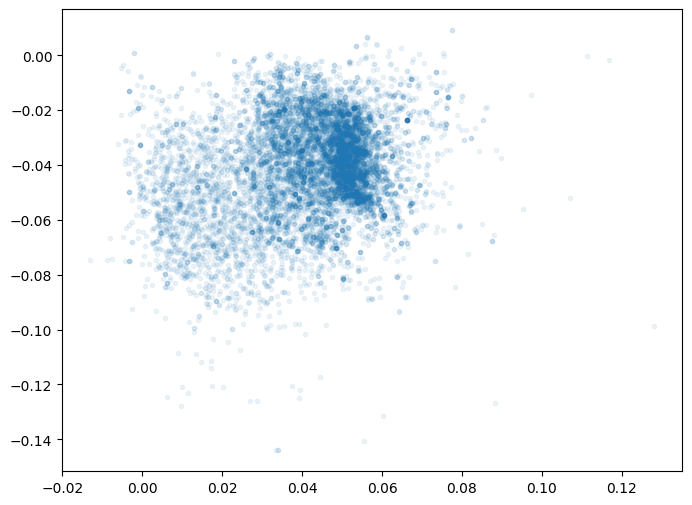

In [128]:
from SeREGen.visualize import repr_scatterplot
repr_scatterplot(p.reprs, savepath='out.png', alpha=.08)

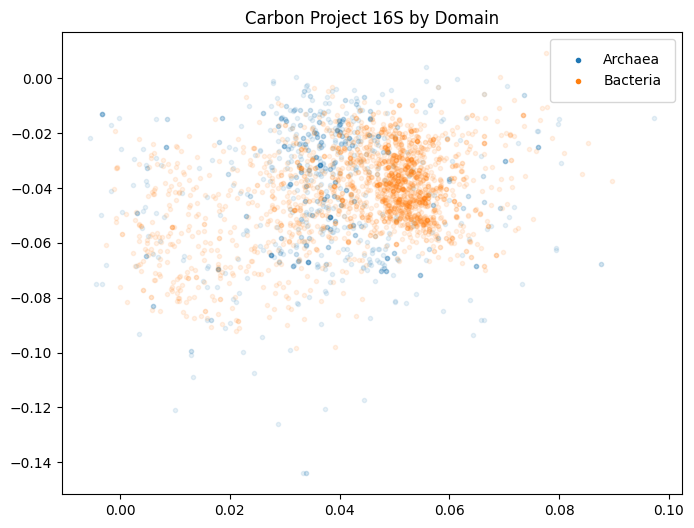

In [133]:
from SeREGen.visualize import reprs_by_ds_label
reprs_by_ds_label(p.reprs, p.dataset, 'Domain', 'Carbon Project 16S by Domain', mask=p.dataset['labels'].apply(lambda i: i[0] != 'UNBINNED').to_numpy())

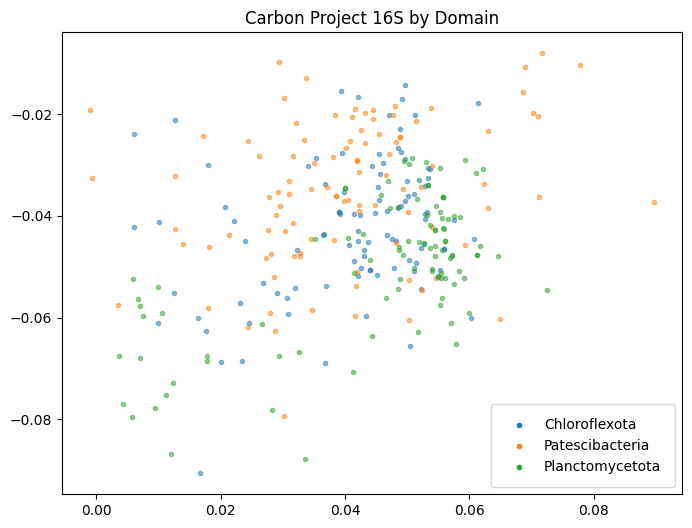

In [139]:
reprs_by_ds_label(p.reprs, p.dataset, 'Phylum', 'Carbon Project 16S by Domain', mask=p.dataset['labels'].label_mask('Domain', 'Bacteria'),
                  filter=100, alpha=.5)

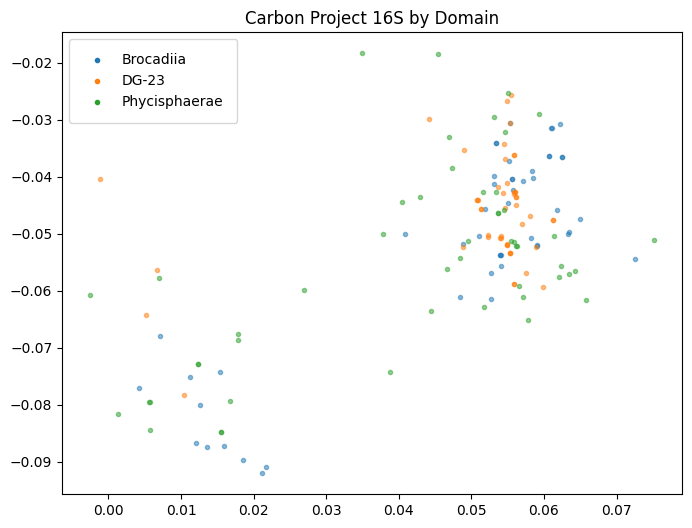

In [140]:
reprs_by_ds_label(p.reprs, p.dataset, 'Class', 'Carbon Project 16S by Domain', mask=p.dataset['labels'].label_mask('Phylum', 'Planctomycetota'),
                  filter=50, alpha=.5)